# Choosing The Best Aircraft

<img src="https://images.unsplash.com/photo-1524592714635-d77511a4834d" alt="drawing" width="700"/>

*Image by S. Esenin from Unsplash*

# Overview

Our company is expanding into new industries to diversify its portfolio. Specifically, we are interested in purchasing and operating airplanes for commercial and private enterprises, despite lacking knowledge about potential risks in the aviation sector.

As the data scientist of the company, my goal is to explore which aircraft present the lowest risk. With my findings, I will create actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

Analysis by Kawsar Hussain

# Challenge

With the task at hand, we will be presenting to our company stakeholders three different recommendations that will directly affect our entry into the aviation industry. The goal is to provide data-driven direction for our new aviation division, using evidence that our recommendations will result in purchasing an aircraft that minimizes risks and maximizes benefits for our new aviation company.

# Dataset

In the `data` folder we pulled [aviation data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety board that includes certain civilian accidents and selected incidents in the United States and international waters spanning from 1962 to 2023.

# Solution

This project utilizes comprehensive risk assessment and statistical analysis to determine the lowest-risk aircraft for our company’s new aviation division. We will formulate three hypotheses regarding the factors that contribute to aircraft safety and operational reliability. By analyzing accident data, we will test these hypotheses and provide evidence-based recommendations that translate into actionable insights, guiding stakeholders in making informed decisions about which aircraft to purchase for commercial and private operations.

# Results

# Code

## Loading Tools

Import our data science tools.

In [5]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Loading Datasets

National Transportation Safety Aviation Accident Data houses vital information for analyzing risks in various aircrafts.

In [7]:
df = pd.read_csv('data/Aviation_Data.csv')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.00,Reciprocating,NaN,NaN,Personal,NaN,2.00,0.00,0.00,0.00,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.00,Reciprocating,NaN,NaN,Personal,NaN,4.00,0.00,0.00,0.00,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.92,-81.88,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.00,Reciprocating,NaN,NaN,Personal,NaN,3.00,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.00,Reciprocating,NaN,NaN,Personal,NaN,2.00,0.00,0.00,0.00,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.00,2.00,NaN,0.00,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.00,1.00,0.00,0.00,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.00,NaN,091,NaN,Personal,NaN,0.00,0.00,0.00,1.00,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [32]:
# df = df[[
#     # 'Event.Id', 'Accident.Number', 'Airport.Code', 'Airport.Name', 'Registration.Number'
#     'Investigation.Type', 'Event.Date','Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity', 'Aircraft.damage',
#     'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
#     'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
#     'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
#     'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
#     'Publication.Date'
#         ]]

In [30]:
df['FAR.Description'].unique()

array([nan, 'Part 129: Foreign', 'Part 91: General Aviation',
       'Part 135: Air Taxi & Commuter', 'Part 125: 20+ Pax,6000+ lbs',
       'Part 121: Air Carrier', 'Part 137: Agricultural',
       'Part 133: Rotorcraft Ext. Load', 'Unknown',
       'Part 91F: Special Flt Ops.', 'Non-U.S., Non-Commercial',
       'Public Aircraft', 'Non-U.S., Commercial', 'Public Use',
       'Armed Forces', 'Part 91 Subpart K: Fractional', '091', 'NUSC',
       '135', 'NUSN', '121', '137', '129', '133', '091K', 'UNK', 'PUBU',
       'ARMF', '103', '125', '437', '107'], dtype=object)

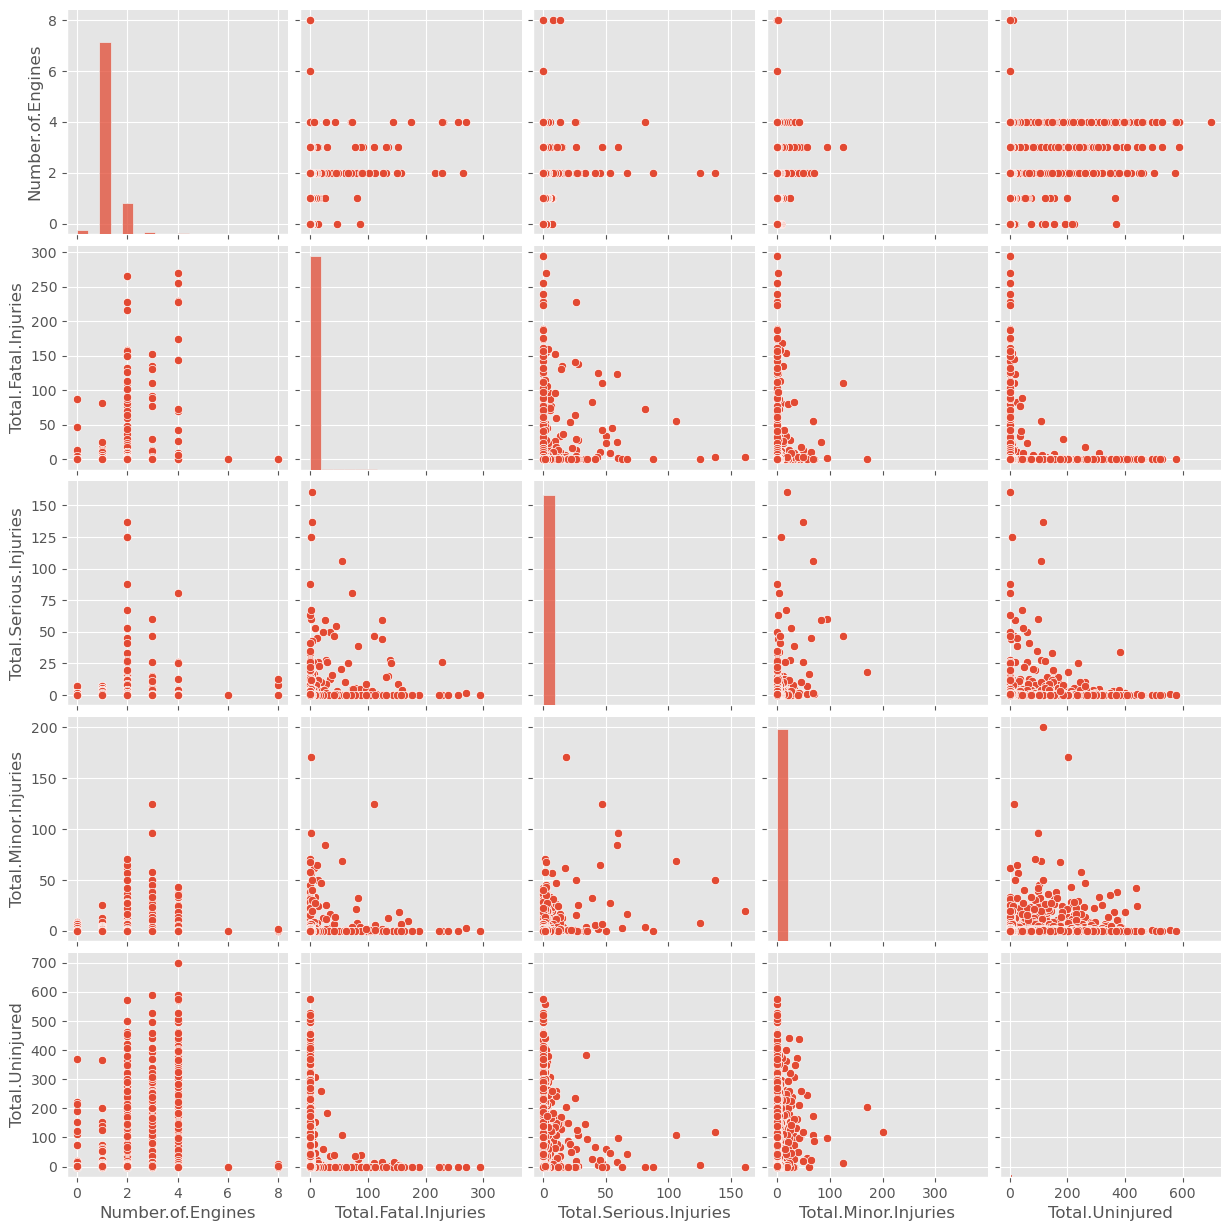

In [31]:
sns.pairplot(data=df)